# Introduction

##### Context of the work:
 
 
##### Research questions:
1) What is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiencea and/or critics agree on the quality of a movie (do they both give high scores or low scores)?

2) How does the year the film was released relate to its IMDb score? How does it relate to its Rotten Tomatoes score? Have audiences and/or critics scored higher or lower for older or newer movies?

3) How does runtime relate to IMDb and Rotten Tomatoes scores, and how has runtime for movies on Netflix changed over the years? Do audiences and/or critics give higher scores to long or short films?

4) How do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream?

5) How does target age range for movies differ across platforms? Do some platforms gear towards younger or older audiences more so than others?


##### Main findings/results:

# Data Description

The data in the analysis-ready data has 2892 entries. Each observation is a movie on Netflix (as of 10 months ago). The attributes are each movie's title, year of production, IMDb score, Rotten Tomatoes score, if it is on Hulu, Prime Video or Disney+ in addition to Netflix, its director(s), genre(s), runtime, and recommended target audience age (how old you should be to watch the film). Only movies with runtimes 60 minutes and above were included in order to ensure the data fit a more standard runtime and do not throw off the analysis with low runtimes (low runtimes come from short films or documentaries that some may consider not to be feature-length movies at all). 

This dataset was created This dataset was created by Ruchi Bhatia, a Data Science Global Ambassador at HP & NVIDIA, for the purpose of exploring which streaming platforms offer which movies, the average IMDb score of movies on different platforms, the year a movie was produced and the platform it can be found on, and the overall analysis of the audience popularity/Rotten Tomatoes score of a movie. This dataset was made publicly available on Kaggle, so it can be assumed that the creator expected others to use this data. 

The creation of this data set did not require funding. This dataset was orginally created by scraping lists of movies available on various streaming platforms along with an IMDb score dataset. This scraping and merging of the data is the only preprocessing that occurred. 

One process that might have influenced what data was observed and recorded and what was not is the data that was available on the lists that were scraped to build the dataset. That is, because these lists were scaped to form the dataset and the data was not build off of information from the platforms themselves, the lists that were used played a direct role in influencing what information was included in the dataset. Furthermore, because this data was scraped months ago, there may be some data included or not included that is not accurate based on the current date simply because the data was collected in the past. 

The raw data source can be found here: https://drive.google.com/drive/folders/1Foj7f58RGYdR1mzI8DUyKA5BMSVx8qSd?usp=sharing

# Preregistration Statements

The first preregistered analysis will look at the relationship between runtime and IMDb scores (and a separate anlysis that looks at runtime and Rotten Tomatoes scores). This will answer the third research quetion: how does runtime relate to IMDb and Rotten Tomatoes scores? Do audiences and/or critics giver higher scores to long or short films This analysis will be performed using runtime as a predictor and then IMDb scores (and Rotten Tomatoes scores in a separate analysis) as an input in a linear regression. This analysis will help determine how/if runtime affects critics' and audiences' scores of a movie. This is interesting information for individuals in the entertainment industry as well as the streaming space, as they may tailor the films they make or the films they show on their platform based on runtime if audiences/critics show a tendancy to favor a short or long film. 

The second preregistered analysis will look at the relationship between IMDb scores and Rotten Tomatoes scores. This will answer my first research question: what is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiences and/or critics agree on the quality of a movie (do they both give high scores or low scores)? This analysis will be performed using IMDb as an input and Rotten Tomatoes as an predictor in a linear regression. This will show if Rotten Tomatoes scores (audience scores) can be predicted from IMDb scores (critics' scores).This analysis will show an interesting relationship (or lack of relationship) between critics' and audiences' scores of a movie.

The third preregistered analysis will look at how IMDb and Rotten Tomatoes scores differ aross the streaming platforms in this data (Netflix, Hulu, Prime Video, and Disney+). This will answer the fourth research question: how do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream? To perform this analysis, the mean IMDb and Rotten Tomatoes scores by platform will be examined and visualized. This analysis will provide insights into which platforms carry the most highly-ranked movies. As consumers of streaming platofrms and the movies on them, this will be interesting information to have to know where to find the "best" (meaning highest-scored) movies. 

# Data Analysis

In [56]:
# Load and clean data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression as lr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
# Load CSV
rawdata = pd.read_csv('OTTdata.csv')
# Remove columns
rawdata = rawdata.drop(columns = ['Type', 'Language', 'Country', 'ID'])
# Remove spaces in column names and "+" from Disney+ column name
new_colnames = [x.replace(" ", "_") for x in rawdata.columns]
rawdata.columns = new_colnames
rawdata = rawdata.rename(columns={'Disney+':'DisneyPlus'})
#Remove incomplete rows
rawdata = rawdata.dropna()
#Remove "+" from age ranges, change "all" categorization to 0, and convert values to float
rawdata['Age'] = [x.replace("+", "") for x in rawdata["Age"]]
rawdata['Age'] = [x.replace("all", "0") for x in rawdata["Age"]]
rawdata['Age'] = rawdata['Age'].astype(float)
#Remove % on Rotten Tomatoes score and convert scores to float
rawdata['Rotten_Tomatoes'] = [x.replace("%", "") for x in rawdata["Rotten_Tomatoes"]]
rawdata['Rotten_Tomatoes'] = rawdata['Rotten_Tomatoes'].astype(float)
rawdata['IMDb'] = rawdata['IMDb'].astype(float)
#Remove movies with low or high runtimes
rawdata = rawdata.loc[rawdata.Runtime>60].copy()
rawdata = rawdata.loc[rawdata.Runtime<180].copy()
#Cleaned data is OTTdata
OTTdata = rawdata

#### IMDb score and Rotten Tomatoes score. This addresses the first research question and second preregistration analysis: What is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiences and/or critics agree on the quality of a movie (do they both give high scores or low scores)?

mean IMDb score of movies on Netflix
6.373764787752257
standard deviation of IMDb score of movies on Netflix
0.9379350694845225
minimum IMDb score of movies on Netflix
2.5
maximum IMDb score of movies on Netflix
9.0


mean Rotten Tomatoes score of movies on Netflix
61.807237299930414
standard deviation of Rotten Tomatoes score of movies on Netflix
26.68285336930154
minimum Rotten Tomatoes score of movies on Netflix
2.0
maximum Rotten Tomatoes score of movies on Netflix
100.0


correlation between IMDb score and Rotten Tomatoes score of movies on Netflix
0.6376943260515737
covariance between IMDb score and Rotten Tomatoes score of movies on Netflix
15.959438110830057


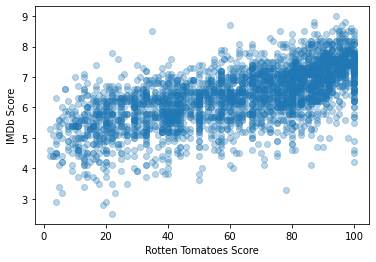

In [57]:
#summary of IMDb score and Rotten Tomatoes score
plt.scatter(x = OTTdata['Rotten_Tomatoes'], y = OTTdata['IMDb'], alpha=.3)
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('IMDb Score')
print('mean IMDb score of movies on Netflix')
print(OTTdata['IMDb'].mean())
print('standard deviation of IMDb score of movies on Netflix')
print(OTTdata['IMDb'].std())
print('minimum IMDb score of movies on Netflix')
print(OTTdata['IMDb'].min())
print('maximum IMDb score of movies on Netflix')
print(OTTdata['IMDb'].max())
print('\n')
print('mean Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].mean())
print('standard deviation of Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].std())
print('minimum Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].min())
print('maximum Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].max())
print('\n')
print('correlation between IMDb score and Rotten Tomatoes score of movies on Netflix')
print(OTTdata.IMDb.corr(OTTdata.Rotten_Tomatoes))
print('covariance between IMDb score and Rotten Tomatoes score of movies on Netflix')
print(OTTdata.IMDb.cov(OTTdata.Rotten_Tomatoes))

There is a strong, positive relationship between the Rotten Tomatoes score and IMDb score. Because the correlation is .63, there is not a perfect relationship, but there is a strong relationship that suggests that a high IMDb score is correlated to a high Rotten Tomatoes score. Furthermore, the covariance is 15.95, which suggests there is a positive covariance between IMDb scores and Rotten Tomatoes scores, meaning an increase in one variable leads to an increase in the other. This is refelcted on the graph; as Rotten Tomatoes scores increase, the IMDb score tends to increase as well. 

The standard deviation for IMDb scores (.93) is small relative to the scale of scores (0 to 10) and the standard deviation for Rotten Tomatoes scores (26.68) is larger relative to the scale of scores (0 to 100). Furthermore, the mean IMDb score of 6.37 mirrors the mean Rotten Tomatoes score of 61.8 in that they both have an average slightly above the midpoint of their scales. It is interesting to note that the maximum IMDb score of movies on Netflix is 9, even though the scale goes all the way to 10. For Rotten Tomatoes scores however, the maximum score is 100, which is using the full scale of 0-100.

linear regression slope of Rotten Tomatoes and IMDb scores:  18.14
r^2 of Rotten Tomatoes and IMDb scores:  0.4066540534783645


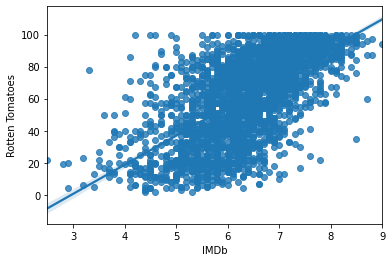

In [58]:
#preregistration analysis 2 - relationship between IMDb scores and Rotten Tomatoes scores
sns.regplot(x="IMDb", y="Rotten_Tomatoes", data=OTTdata);
plt.xlabel('IMDb')
plt.ylabel('Rotten Tomatoes')
regression = lr()
x = np.array(OTTdata['IMDb'])
y = np.array(OTTdata['Rotten_Tomatoes'])
fitx = x.reshape(-1,1)
fity = y
reg = regression.fit(fitx, fity)
ypredicted = regression.predict(fitx)
meany = sum(y) / len(y)
SST = sum((y - meany) ** 2)
SSR = sum((y - ypredicted) ** 2)
coefdet = 1 - (SSR/SST)
print ('linear regression slope of Rotten Tomatoes and IMDb scores: ', round(reg.coef_[0],2))
print ('r^2 of Rotten Tomatoes and IMDb scores: ', coefdet)

The linear regression slop of 18.14 suggests that the Rotten Tomatoes score increases by 18.14 for each increase of 1 of the IMDb score. This is a positive relationship, and reinforces that a high Rotten Tomatoes score is likely related to a high IMDb score. The r^2 value of .4 suggests that less than half of Rotten Tomatoes scores can be predicted by IMDb scores. This low r^2 value suggests that this data does not accurately fit the model.

#### Release year, IMDb score, and Rotten Tomatoes score. This addresses my second research question: How does the year the film was released relate to its IMDb score? How does it relate to its Rotten Tomatoes score? Have audiences and/or critics scored higher or lower for older or newer movies?

In [59]:
#summary of release year data
print('mean release year of movies on Netflix')
print(OTTdata['Year'].mean())
print('earliest release year of movies on Netflix')
print(OTTdata['Year'].min())
print('most recent release year of movies on Netflix')
print(OTTdata['Year'].max())

mean release year of movies on Netflix
2007.2393876130827
earliest release year of movies on Netflix
1919
most recent release year of movies on Netflix
2020


correlation between IMDb score and year
-0.1266958628891991
covariance between IMDb score and year
-1.638687843360096


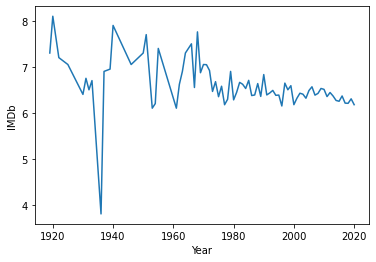

In [60]:
# release year and IMDb score
print('correlation between IMDb score and year')
print(OTTdata.IMDb.corr(OTTdata.Year))
print('covariance between IMDb score and year')
print(OTTdata.IMDb.cov(OTTdata.Year))
yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'IMDb'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('IMDb')
plt.show()

The correlation between IMDb score and year is negative but small at -.12, which aligns with the graph in suggesting that IMDb scores have slightly gone down (decrease) as years go on (increase). Furthermore, the negative covariance of -1.63 suggests a negative relationship between IMDb score and year. That is, as years go on (increase), IMDb scores decrease slightly.

correlation between Rotten Tomatoes score and year
-0.04349070033389965
covariance between Rotten Tomatoes score and year
-16.00256848672196


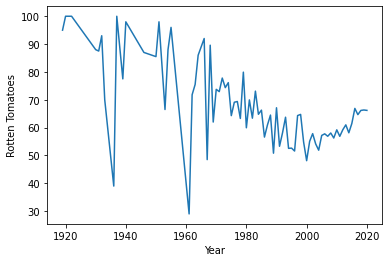

In [61]:
# release year and Rotten Tomatoes score
print('correlation between Rotten Tomatoes score and year')
print(OTTdata.Rotten_Tomatoes.corr(OTTdata.Year))
print('covariance between Rotten Tomatoes score and year')
print(OTTdata.Rotten_Tomatoes.cov(OTTdata.Year))
yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'Rotten_Tomatoes'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes')
plt.show()

The correlation between Rotten Tomatoes score and year is negative but very small at -.04, which aligns with the graph in showing an overall trend of Rotten Tomatoes scores decreasing as years go on (increase). Furthermore, the negative covariance of -16 suggests a negative relationship between Rotten Tomatoes score and year: as years go on (increase), Rotten Tomatoes scores decrease. It is important to note that this graph has many high and low spikes of Rotten Tomatoes scores over time, which could explain why the correlation is so close to zero. A correlation of zero suggests there is no relationship between variables, and here the high and low spikes of scores may interfere with any statistical relationship over time. 

When looking at this analysis of Rotten Tomatoes scores and relesase year compared to IMDb scores and release year, there is the similar negative relationship between scores and year: as time increase (years go by), the scores decrease. 

#### Runtime, IMDb score, and Rotten Tomatoes score. This addresses the third research question and first preregistration analysis: How does runtime relate to IMDb and Rotten Tomatoes scores, and how has runtime for movies on Netflix changed over the years? Do audiences and/or critics give higher scores to long or short films?

mean Runtime of movies on Netflix
103.25434933890048
min Runtime of movies on Netflix
61.0
max Runtime of movies on Netflix
177.0
Runtime standard deviation of movies on Netflix
17.147778796644083


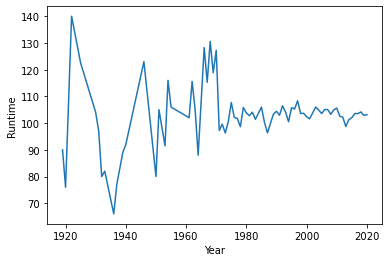

In [62]:
#summary of runtime
print('mean Runtime of movies on Netflix')
print(OTTdata['Runtime'].mean())
print('min Runtime of movies on Netflix')
print(OTTdata['Runtime'].min())
print('max Runtime of movies on Netflix')
print(OTTdata['Runtime'].max())
print('Runtime standard deviation of movies on Netflix')
print(OTTdata['Runtime'].std())
yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'Runtime'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

The runtime of movies on Netflix averages an hour and 43 minutes. Movies made after 1980 also have a more consistent runtime of around 100 to 110 minutes (which is interestingly around the mean runtime of all movies on Netflix, suggesting the majority of the movies on Netflix are from 1980 onwards).

In [63]:
# TO DO add in graph that just shows movies from 1980 on

correlation between Runtime and Rotten Tomatoes score
0.07192514666709637
covariance between Runtime and Rotten Tomatoes score
32.90947077401702


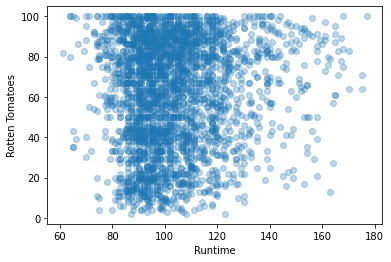

In [64]:
# Runtime and Rotten Tomatoes
plt.scatter(x = OTTdata['Runtime'], y = OTTdata['Rotten_Tomatoes'], alpha=.3)
plt.xlabel('Runtime')
plt.ylabel('Rotten Tomatoes')
print('correlation between Runtime and Rotten Tomatoes score')
print(OTTdata.Runtime.corr(OTTdata.Rotten_Tomatoes))
print('covariance between Runtime and Rotten Tomatoes score')
print(OTTdata.Runtime.cov(OTTdata.Rotten_Tomatoes))

The correlation between Rotten Tomatoes scores and Runtime is close to zero at .07, meaning there is likely no correlation or relationship between the two.

correlation between Runtime and IMDb Tomatoes score
0.2667396000903218
covariance between Runtime and IMDb score
4.290107184181377


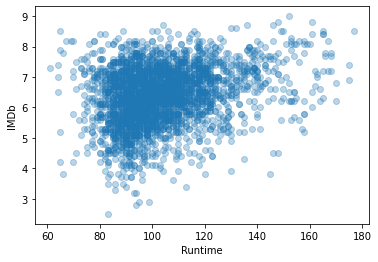

In [65]:
# Runtime and IMDb
plt.scatter(x = OTTdata['Runtime'], y = OTTdata['IMDb'], alpha=.3)
plt.xlabel('Runtime')
plt.ylabel('IMDb')
print('correlation between Runtime and IMDb Tomatoes score')
print(OTTdata.Runtime.corr(OTTdata.IMDb))
print('covariance between Runtime and IMDb score')
print(OTTdata.Runtime.cov(OTTdata.IMDb))

There is a slightly positive correlation (.26) between the IMDb score and runtime of movies on Netflix, so as runtime increases IMDb scores increase slightly too. 

linear regression slope:  0.01
r^2:  0.07115001425635481


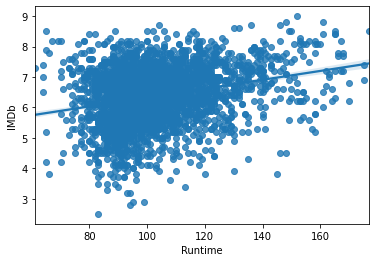

In [66]:
# preregirstration 1 - relationship between runtime and IMDb scores
sns.regplot(x="Runtime", y="IMDb", data=OTTdata);
regression = lr()
x = np.array(OTTdata['Runtime'])
y = np.array(OTTdata['IMDb'])
fitx = x.reshape(-1,1)
fity = y
reg = regression.fit(fitx, fity)
ypredicted = regression.predict(fitx)
meany = sum(y) / len(y)
SST = sum((y - meany) ** 2)
SSR = sum((y - ypredicted) ** 2)
coefdet = 1 - (SSR/SST)
print ('linear regression slope: ', round(reg.coef_[0],2))
print ('r^2: ', coefdet)

The linear regression slope of runtime and IMDb scores is .01, which indicates that an increase in runtime of 1 leads to an increase in .01 of the IMDb score. Furthermore, the r^2 of close to zero indicates that runtime cannot be predicted by the input of IMDb scores. 

linear regression slope:  0.11
r^2:  0.005173226723067081


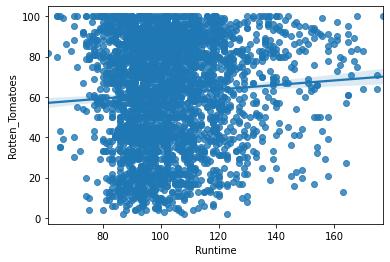

In [67]:
# preregistration 1 - relationship between runtime and Rotten Tomatoes scores
sns.regplot(x="Runtime", y="Rotten_Tomatoes", data=OTTdata);
regression = lr()
x = np.array(OTTdata['Runtime'])
y = np.array(OTTdata['Rotten_Tomatoes'])
fitx = x.reshape(-1,1)
fity = y
reg = regression.fit(fitx, fity)
ypredicted = regression.predict(fitx)
meany = sum(y) / len(y)
SST = sum((y - meany) ** 2)
SSR = sum((y - ypredicted) ** 2)
coefdet = 1 - (SSR/SST)
print ('linear regression slope: ', round(reg.coef_[0],2))
print ('r^2: ', coefdet)

The linear regression slope of runtime and Rotten Tomatoes scores is .11, which indicates that an increase in runtime of 1 leads to an increase in .11 of the Rotten Tomatoes score. Furthermore, the r^2 of close to zero indicates that runtime cannot be predicted by the input of IMDb scores. 

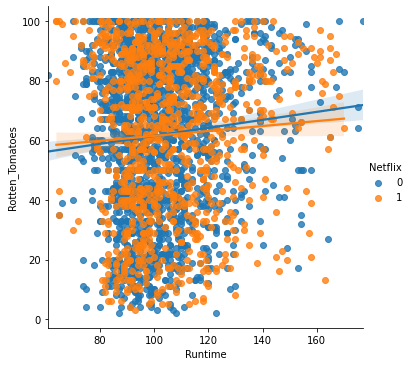

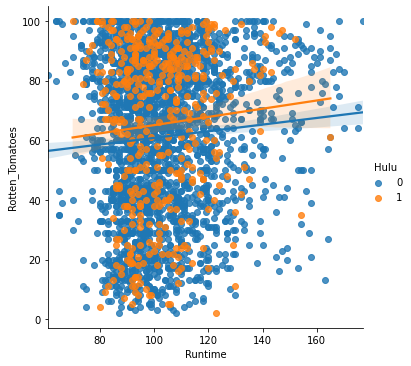

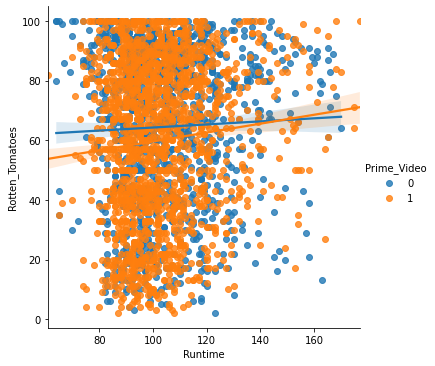

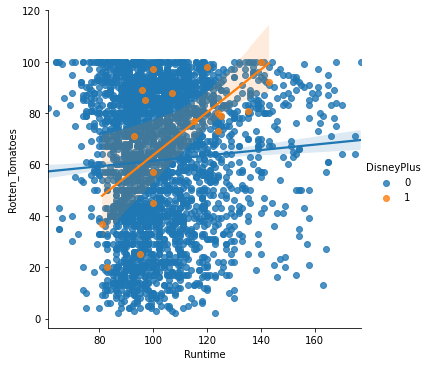

In [68]:
# Rotten Tomatoes and Runtime by platform
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='Netflix', data=OTTdata);
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='Hulu', data=OTTdata);
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='Prime_Video', data=OTTdata);
sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue='DisneyPlus', data=OTTdata)

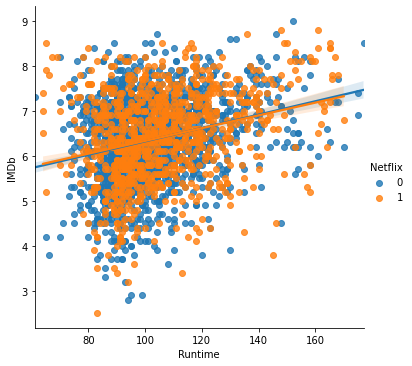

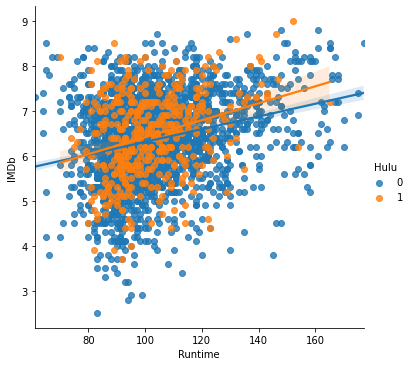

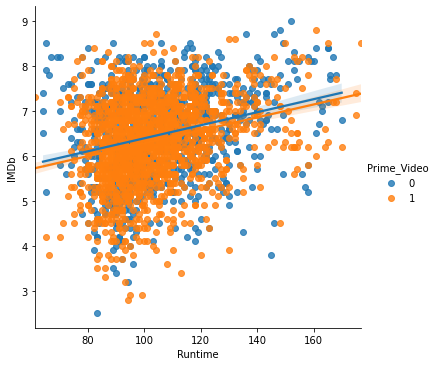

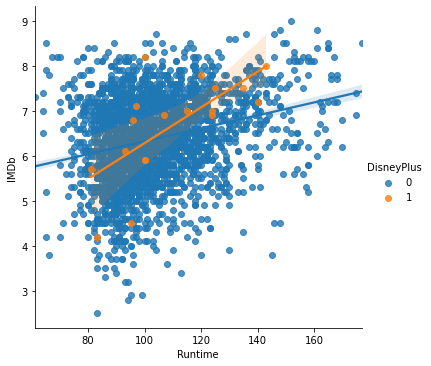

In [69]:
# IMDb and Runtime by platform
sns.lmplot(x="Runtime", y="IMDb", hue='Netflix', data=OTTdata);
sns.lmplot(x="Runtime", y="IMDb", hue='Hulu', data=OTTdata);
sns.lmplot(x="Runtime", y="IMDb", hue='Prime_Video', data=OTTdata);
sns.lmplot(x="Runtime", y="IMDb", hue='DisneyPlus', data=OTTdata)

The above graphs illustrate how IMDb and Rotten Tomatoes scores relate to runtime on individual streaming platforms (Netflix, Hulu, Disney Plus, Amazon Video). The orange coloring indicates the movies that are on both Netflix and the platofrm being analyzed in the figure. The blue coloring indicates the movies that are just on Netflix and not on the specific platform being analyzed as well. The graphs suggest that the other streaming platforms (Disney Plus, Hulu, and Amazon Prime) have variation among the IMDb and Rotten Tomatoes scores that is similar to Netflix. That is, one platform does not appear to having more higher-scoring movies than Netflix, they seem to follow the same distribution patterns of some high- and low-scoring movies. 

#### IMDb score and Rotten Tomatoes score by platform. This answeres the fourth research question and third preregistration analysis: How do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream?

mean IMDb score for movies on Netflix
6.412410986775183


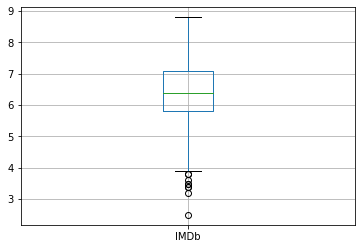

In [70]:
# IMDbscores by platform - Netflix
Netflixmovies = OTTdata[OTTdata.Netflix==1]
Netflixmovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Netflix')
print(Netflixmovies['IMDb'].mean())

mean IMDb score for movies on Prime Video
6.316637375512601


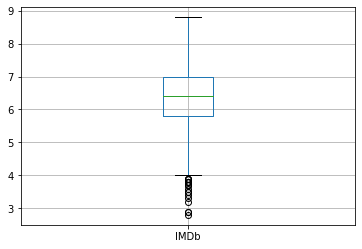

In [71]:
# IMDbscores by platform - Prime Video
Prime_Videomovies = OTTdata[OTTdata.Prime_Video==1]
Prime_Videomovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Prime Video')
print(Prime_Videomovies['IMDb'].mean())

mean IMDb score for movies on Disney+
6.677777777777779


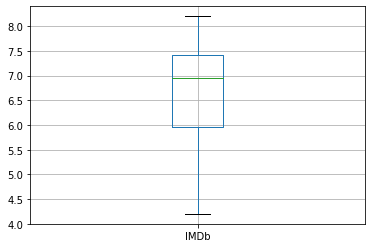

In [72]:
# IMDbscores by platform - Disney+
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
Disneymovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Disney+')
print(Disneymovies['IMDb'].mean())

mean IMDb score for movies on Hulu
6.456410256410259


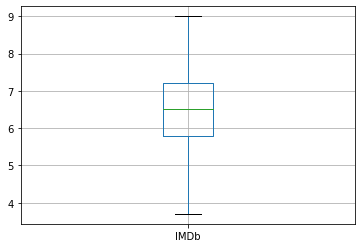

In [73]:
# IMDbscores by platform - Hulu
Hulumovies = OTTdata[OTTdata.Hulu==1]
Hulumovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Hulu')
print(Hulumovies['IMDb'].mean())

mean Rotten_Tomatoes score for movies on Netflix
61.927772126144454


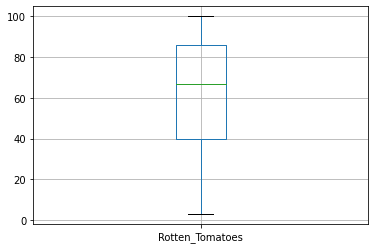

In [74]:
# Rotten Tomatoes score by platform - Netflix
Netflixmovies = OTTdata[OTTdata.Netflix==1]
Netflixmovies.boxplot(column='Rotten_Tomatoes')
print('mean Rotten_Tomatoes score for movies on Netflix')
print(Netflixmovies['Rotten_Tomatoes'].mean())

mean Rotten_Tomatoes score for movies on Prime Video
59.95899238429994


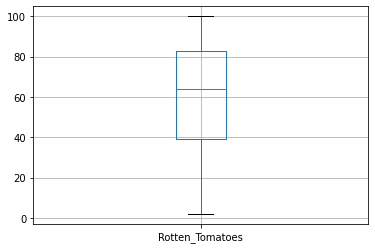

In [75]:
# Rotten Tomatoes score by platform - Prime Video
Prime_Videomovies = OTTdata[OTTdata.Prime_Video==1]
Prime_Videomovies.boxplot(column='Rotten_Tomatoes')
print('mean Rotten_Tomatoes score for movies on Prime Video')
print(Prime_Videomovies['Rotten_Tomatoes'].mean())

mean Rotten_Tomatoes score for movies on Disney+
71.88888888888889


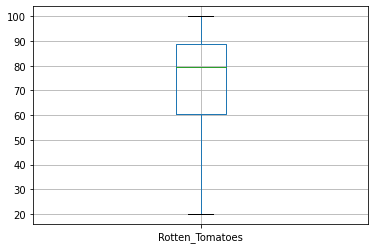

In [76]:
# Rotten Tomatoes score by platform - Disney+
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
Disneymovies.boxplot(column='Rotten_Tomatoes')
print('mean Rotten_Tomatoes score for movies on Disney+')
print(Disneymovies['Rotten_Tomatoes'].mean())

mean Rotten_Tomatoes score for movies on Hulu
65.36596736596736


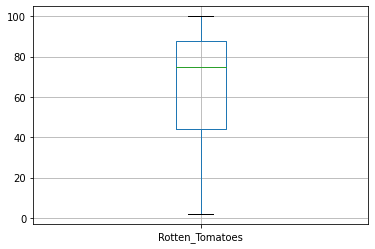

In [77]:
# Rotten Tomatoes by platform - Hulu
Hulumovies = OTTdata[OTTdata.Hulu==1]
Hulumovies.boxplot(column='Rotten_Tomatoes')
print('mean Rotten_Tomatoes score for movies on Hulu')
print(Hulumovies['Rotten_Tomatoes'].mean())

The mean IMDb scores by platform range from 6.3 to 6.6. This suggests that there is little variation among the mean IMDd scores of movies on different platforms, as they all have similar means. Furthermore, the mean Rotten Tomatoes scores by platform range from 59.9 to 71.8. It makes sense that there is a bit more range for these scores since the Rotten Tomatoes scale is larger than the IMDb scale (1 to 100 versus 1 to 10). Still, it is noteworthy that Disney+ has the highest average Rotten Tomatoes score and Prime Video has the lowest. This suggests that audiences may favor or enjoy content more on Disney+ due to the higher average Rotten Tomatoes score. 

#### Target audience age and platform. This addresses the fifth research question: How does target age range for movies differ across platforms? Do some platforms gear towards younger or older audiences more so than others?

mean target age for movies on Hulu
14.564102564102564
standard deviation of target age for movies on Hulu
4.596699135545754


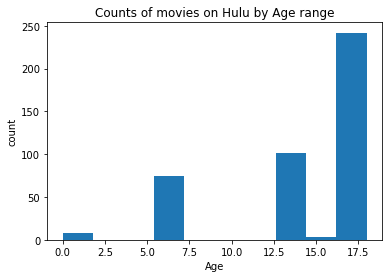

In [78]:
#age and Hulu
Hulumovies = OTTdata[OTTdata.Hulu==1]
plt.hist(Hulumovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Hulu by Age range')
print('mean target age for movies on Hulu')
print(Hulumovies['Age'].mean())
print('standard deviation of target age for movies on Hulu')
print(Hulumovies['Age'].std())

Movies on Hulu tend to skew older, and have a mean minimum age of 14.5.

mean target age for movies on Disney+
9.5
standard deviation of target age for movies on Disney+
4.817248421343991


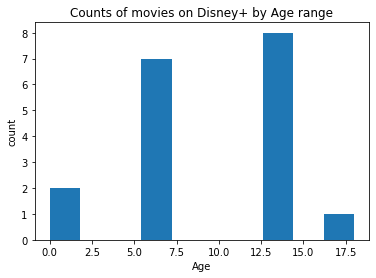

In [79]:
# age and Disney+
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
plt.hist(Disneymovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Disney+ by Age range')
print('mean target age for movies on Disney+')
print(Disneymovies['Age'].mean())
print('standard deviation of target age for movies on Disney+')
print(Disneymovies['Age'].std())

Although the counts for movies on Disney+ are lower, the mean minimum age is significantly lower than other platforms at 9.5. Interestingly, the standard deviation is similar to Hulu's, suggesting that platforms offer programming within 5 years of their reccommended minimum audience age. 

mean target age for movies on Prime Video
14.565319273579378
standard deviation of target age for movies on Prime Video
4.84068986519906


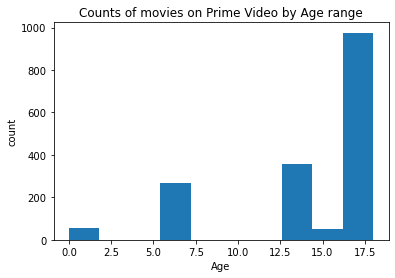

In [80]:
# age and Prime Video
Primemovies = OTTdata[OTTdata.Prime_Video==1]
plt.hist(Primemovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Prime Video by Age range')
print('mean target age for movies on Prime Video')
print(Primemovies['Age'].mean())
print('standard deviation of target age for movies on Prime Video')
print(Primemovies['Age'].std())

Prime Video has a similar mean minimum age to Hulu at 14.5, suggesting it might have similar target audiences.

mean target age for movies on Netflix
14.442522889114954
standard deviation of target age for movies on Netflix
4.633459131870704


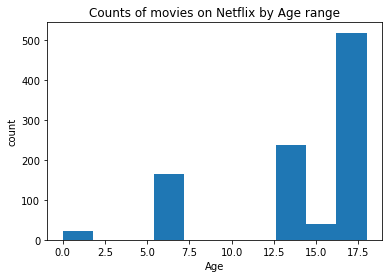

In [81]:
# age and Netflix
Netflixmovies = OTTdata[OTTdata.Netflix==1]
plt.hist(Netflixmovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Netflix by Age range')
print('mean target age for movies on Netflix')
print(Netflixmovies['Age'].mean())
print('standard deviation of target age for movies on Netflix')
print(Netflixmovies['Age'].std())

Netflix has a similar mean minimum age to Hulu and Prime Video at 14.4, again suggesting it might have similar target audiences. It also has a standard deviation of 4.6 for target audience age which is similar to the other platforms. 

## Evaluation of significance

In [84]:
sm_model = smf.ols('IMDb ~ Rotten_Tomatoes', data=OTTdata)
result = sm_model.fit()
result.pvalues

Intercept          0.0
Rotten_Tomatoes    0.0
dtype: float64

This low p-value (0) suggests that the null hypothesis (that there is no relationship between IMDb scores and Rotten Tomatoes scores) should be rejected, suggesting that there is a relationship between the two variables. However, it is important to note in this case that these are categorical variables, specifically ordinal variables. That is, they are ordered categories (or in this case, scores) that do not influence the next score. Therefore, the p-value may not be an accurate predictor of significance for these variables. 

# Interpretation and Conslusions

FINISH What did you find over the course of your data analysis, and how confident are you in these conclusions? Detail your results more so than in the introduction, now that the reader is familiar with your methods and analysis. Interpret these results in the wider context of the real-life application from where your data hails

# Limitations

This data is limited in that it only contains information from the lists it was scraped from. Furthermore, in the data cleaning process, some data observations were removed because they had incomplete information (such as missing runtime or IMDb/Rotten Tomatoes score. Therefore not all movies that are available on Netflix (as of 10 months ago) are represented here. Furthermore, because this data was updated only 10 months ago, it may not reflect the current distribution of movies across streaming platforms; for example, a movie that was not on Disney+ 10 months ago may be now, but that is not reflected in this dataset.

The assumptions in the anlyses in this report are that the data is a complete view of movies on Netflix and other streaming platforms, which is not the case given the data limitation and cleaning requirements. It was necessary to assume that this data gave a complete view of all the movies on Netflix in order to draw conclusions about relationships between the variables and the summaries of the variables, because it was necessary to assume all information was here. 

# Source Code

# Acknowledgements

# Appendix: Data Cleaning Description